<table>
<tr style="border:none;">
<td style="border:none;"><a href="https://fra.utn.edu.ar/">
<image src="https://raw.githubusercontent.com/epplugins/UTN/main/assets/img/logoUTN-500.svg"  width="100">
</a></td>
<td style="border:none;">Física 2<br>2024<br>Electromagnetismo<br>Material para trabajo en clase
</td>
</tr>
</table> 

# Campo Eléctrico

<table>
<tr style="border:none;">
<td style="border:none;"><a href="https://creativecommons.org/licenses/by-nc-sa/4.0/deed.es"><image src="https://raw.githubusercontent.com/epplugins/UTN/main/assets/img/by-nc-sa.svg" width="70" /></a></td>
<td style="border:none;">Edgardo Palazzo (epalazzo@fra.utn.edu.ar)
</td>
</tr>
</table>

---

**Tabla de contenidos**<a id='toc0_'></a>    
- 1. [Campo de una carga](#toc1_)    
- 2. [Campo de dos cargas](#toc2_)    
  - 2.1. [El dipolo eléctrico](#toc2_1_)    
  - 2.2. [Dos cargas de diferente valor](#toc2_2_)    
  - 2.3. [Ejercicio](#toc2_3_)    
  - 2.4. [Más de dos cargas](#toc2_4_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [80]:
import matplotlib.pyplot as plt
import numpy as np
import lib_em as em
import importlib  # Not needed after final version.


In [81]:
# Remove this cell.
importlib.reload(em)


<module 'lib_em' from '/home/edg/UTN/electromagnetismo/lib_em.py'>

## 1. <a id='toc1_'></a>[Campo de una carga](#toc0_)

El campo eléctrico producido por una carga puntual $q_0$ ubicada en la posición $\vec{\text{x}}_0$ puede escribirse como:
$$
\vec{E}(\vec{\text{x}}) = \frac{1}{4\pi\varepsilon_0} \frac{q}{|\vec{\text{r}}|^2} \hat{\text{r}}\, , \tag{1}
$$
donde
  * $|\vec{r}|$ es la distancia entre la posición de la partícula cargada ($\vec{\text{x}}_0$) y la posición donde se quiere obtener el vector de campo eléctrico ($\vec{\text{x}}$)
  * $\hat{\text{r}}$ es el vector unitario en la dirección desde $\vec{\text{x}}_0$ hacia $\vec{\text{x}}$

según se muestra en la siguiente figura.

<div>
       <a href="https://fra.utn.edu.ar/">
       <image src="https://raw.githubusercontent.com/epplugins/UTN/main/electromagnetismo/img/em01_una_carga.svg">
       </a>
</div>

Si el vector unitario se reescribe como $\hat{r} = \vec{\text{r}}/|\vec{\text{r}}|$, la expresión para el campo resulta:
$$
\vec{E}(\vec{\text{x}}) = \frac{1}{4\pi\varepsilon_0} \frac{q}{|\vec{\text{r}}|^3} \vec{\text{r}}\, . \tag{2}
$$

Para escribir un código que calcule el campo eléctrico es conveniente utilizar una expresión con las coordenadas del punto campo y la posición de la carga explícitas. El código que utilizaremos reproduce la siguiente expresión:
$$
\vec{E}(x,y,z) = \frac{1}{4\pi\varepsilon_0} \frac{q}{\left ((x-x_0)^2 + (y-y_0)^2 + (z-z_0)^2 \right )^{3/2}} \left ( (x-x_0)\hat{i} + (y-y_0)\hat{j} + (z-z_0)\hat{k} \right ) . \tag{3}
$$

Definición de una función que calcula las componentes del campo eléctrico en la posición $(x,y,z)$ cuando se tiene una carga de $1~\text{nC}$ en el origen:

In [73]:
def E(x,y,z):
    """Calcula las componentes del campo eléctrico en N/C.
    Ingresar valores de x,y,z en metros y q en coulomb.
    """
    q = 1E-9
    x0 = 0
    y0 = 0
    z0 = 0

    r = ((x - x0)**2 + (y - y0)**2 + (z - z0)**2)**(3/2)
    Ei = 9E9 * q * (x - x0) / r
    Ej = 9E9 * q * (y - y0) / r
    Ek = 9E9 * q * (z - z0) / r

    return Ei, Ej, Ek

Si queremos el vector campo eléctrico en alguna posición, simplemente se ingresan los valores de $x,y,z$:

In [74]:
E(-1,0,0)

(-9.0, 0.0, 0.0)

In [87]:
importlib.reload(em)


<module 'lib_em' from '/home/edg/UTN/electromagnetismo/lib_em.py'>

/tmp/ipykernel_5274/1939512742.py:11: RuntimeWarning: invalid value encountered in divide
  Ei = 9E9 * q * (x - x0) / r
/tmp/ipykernel_5274/1939512742.py:12: RuntimeWarning: invalid value encountered in divide
  Ej = 9E9 * q * (y - y0) / r
/tmp/ipykernel_5274/1939512742.py:13: RuntimeWarning: invalid value encountered in divide
  Ek = 9E9 * q * (z - z0) / r


True

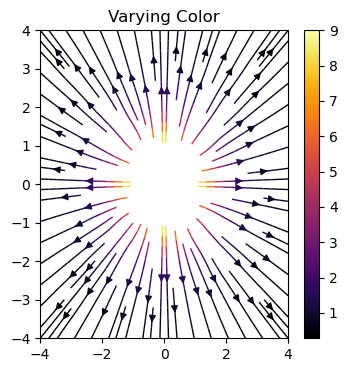

In [88]:
w = 4
num = 9j
Y, X = np.mgrid[-w:w:num, -w:w:num]
Z = 0*X
Ei, Ej, Ek = E(X,Y,Z)
# U = -1 - X**2 + Y
# V = 1 + X - Y**2
mE = np.sqrt(Ei**2 + Ej**2)

em.plotE(X,Y,Z,Ei,Ej,Ek,E)

/tmp/ipykernel_5274/1939512742.py:11: RuntimeWarning: invalid value encountered in divide
  Ei = 9E9 * q * (x - x0) / r
/tmp/ipykernel_5274/1939512742.py:12: RuntimeWarning: invalid value encountered in divide
  Ej = 9E9 * q * (y - y0) / r
/tmp/ipykernel_5274/1939512742.py:13: RuntimeWarning: invalid value encountered in divide
  Ek = 9E9 * q * (z - z0) / r


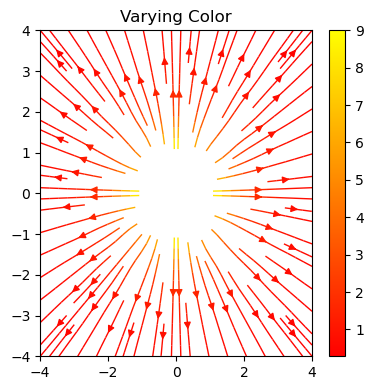

In [75]:
w = 4
num = 9j
Y, X = np.mgrid[-w:w:num, -w:w:num]
Z = 0*X
Ei, Ej, Ek = E(X,Y,Z)
# U = -1 - X**2 + Y
# V = 1 + X - Y**2
mE = np.sqrt(Ei**2 + Ej**2)

# fig, axs = plt.subplots(3, 2, figsize=(7, 9), height_ratios=[1, 1, 2])
fig, axs = plt.subplots(1, 1, figsize=(4, 4))
# axs = axs.flat

#  Varying density along a streamline
# axs.streamplot(X, Y, U, V, density=[0.5, 1])
# axs.set_title('Varying Density')

# # Varying color along a streamline
strm = axs.streamplot(X, Y, Ei, Ej, color=mE, linewidth=1, cmap='autumn')
fig.colorbar(strm.lines)
axs.set_title('Varying Color')

# #  Varying line width along a streamline
# lw = 5*speed / speed.max()
# axs[2].streamplot(X, Y, U, V, density=0.6, color='k', linewidth=lw)
# axs[2].set_title('Varying Line Width')

# # Controlling the starting points of the streamlines
# seed_points = np.array([[-2, -1, 0, 1, 2, -1], [-2, -1,  0, 1, 2, 2]])

# strm = axs[3].streamplot(X, Y, U, V, color=U, linewidth=2,
#                          cmap='autumn', start_points=seed_points.T)
# fig.colorbar(strm.lines)
# axs[3].set_title('Controlling Starting Points')

# # Displaying the starting points with blue symbols.
# axs[3].plot(seed_points[0], seed_points[1], 'bo')
# axs[3].set(xlim=(-w, w), ylim=(-w, w))

# # Create a mask
# mask = np.zeros(U.shape, dtype=bool)
# mask[40:60, 40:60] = True
# U[:20, :20] = np.nan
# U = np.ma.array(U, mask=mask)

# axs[4].streamplot(X, Y, U, V, color='r')
# axs[4].set_title('Streamplot with Masking')

# axs[4].imshow(~mask, extent=(-w, w, -w, w), alpha=0.5, cmap='gray',
#               aspect='auto')
# axs[4].set_aspect('equal')

# axs[5].streamplot(X, Y, U, V, broken_streamlines=False)
# axs[5].set_title('Streamplot with unbroken streamlines')

plt.tight_layout()
plt.show()

In [76]:
EE = np.vstack((Ei.ravel(),Ej.ravel()))
EE


array([[-0.19887378, -0.216     , -0.20124612, -0.12840121,  0.        ,
         0.12840121,  0.20124612,  0.216     ,  0.19887378, -0.288     ,
        -0.35355339, -0.38402321, -0.28460499,  0.        ,  0.28460499,
         0.38402321,  0.35355339,  0.288     , -0.40249224, -0.57603482,
        -0.79549513, -0.80498447,  0.        ,  0.80498447,  0.79549513,
         0.57603482,  0.40249224, -0.51360485, -0.85381497, -1.60996894,
        -3.18198052,  0.        ,  3.18198052,  1.60996894,  0.85381497,
         0.51360485, -0.5625    , -1.        , -2.25      , -9.        ,
                nan,  9.        ,  2.25      ,  1.        ,  0.5625    ,
        -0.51360485, -0.85381497, -1.60996894, -3.18198052,  0.        ,
         3.18198052,  1.60996894,  0.85381497,  0.51360485, -0.40249224,
        -0.57603482, -0.79549513, -0.80498447,  0.        ,  0.80498447,
         0.79549513,  0.57603482,  0.40249224, -0.288     , -0.35355339,
        -0.38402321, -0.28460499,  0.        ,  0.2

In [59]:
EE[8,0]

0.1988737822087165

In [54]:
positions = np.vstack([X.ravel(), Y.ravel()])
# xyz = np.vstack((x.flat,y.flat,z.flat)).T
# speed[4,4]

In [55]:
positions[0,0]

-4.0

In [9]:
x = np.arange(4)
y = np.arange(4)
z = np.arange(4)
E(x,y,z)

/tmp/ipykernel_12250/329256007.py:11: RuntimeWarning: invalid value encountered in divide
  Ei = 9E9 * q * (x - x0) / r
/tmp/ipykernel_12250/329256007.py:12: RuntimeWarning: invalid value encountered in divide
  Ej = 9E9 * q * (y - y0) / r
/tmp/ipykernel_12250/329256007.py:13: RuntimeWarning: invalid value encountered in divide
  Ek = 9E9 * q * (z - z0) / r


(array([       nan, 1.73205081, 0.4330127 , 0.19245009]),
 array([       nan, 1.73205081, 0.4330127 , 0.19245009]),
 array([       nan, 1.73205081, 0.4330127 , 0.19245009]))

## 2. <a id='toc2_'></a>[Campo de dos cargas](#toc0_)

### 2.1. <a id='toc2_1_'></a>[El dipolo eléctrico](#toc0_)

In [5]:
# some code

### 2.2. <a id='toc2_2_'></a>[Dos cargas de diferente valor](#toc0_)

In [6]:
# some code

### 2.3. <a id='toc2_3_'></a>[Ejercicio](#toc0_)

In [1]:
# Algo, buscar los valores de E, la posición de la carga, o la fuerza sobre una carga.

# Buscar los ángulos para el vector, en posiciones conocidas, luego en cualquier lugar, luego con alguna condición como que apunte en cierta dirección.

### 2.4. <a id='toc2_4_'></a>[Más de dos cargas](#toc0_)